# Crimes in Chicago - A cursory study.

## This document demonstrates a cursory study on the crimes in Chicago dataset, using some common Data Science methodologies in Python.

### A quick information about the dataset:

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

Some information on the dataset's columns:

<strong>ID & Case number</strong>: These uniquely represent the ID and the Case number values of the crimes and hence are primary keys.

<strong>Date</strong>: Date when the incident occured.

<strong>Block</strong>: The name of the block where the crime/incident happened.

<strong>IUCR</strong>: The Illionis Uniform Crime reporting code. This is directly linked to the primary type/description of a crime.

<strong>Primary Type</strong>: The primary description or type of the crime according to IUCRs.

<strong>Description</strong>: The secondary description or type of the crime according to IUCRs.

<strong>Location Description</strong>: Description of the location where the incident happened.

<strong>Arrest</strong>: Indicates whether or not an arrest was made.

<strong>Domestic</strong>: Indicates whether the crime was domestic related as defined by Illionis Domestic Violence Act.

<strong>Beat</strong>: Indicates the beat where the incident/crime occured. A beat is a smallest police geographic area.

<strong>District & Ward</strong>: Indicates district and ward where the incident occured, respectively.

<strong>Community area</strong>: Indicates community area where the incident occured.

<strong>FBI Code</strong>: Indicates the crime classification code as per FBI.

<strong>X and Y co-ordinates</strong>: Indicates X & Y co-ordinates of the location where the incident occured, respectively.

<strong>Year and Last Updated</strong>: Indicates time of when the incident occured, and when the incident report was last updated, respectively.

<strong>Latitude, Longitude & Location</strong>: Indicates the latitude and longitude of location where the incident occured.


Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

Importing the dataset into IPython Environment:

In [2]:
crime_data = pd.read_csv('crimes17.csv')

Having a quick look at few rows of the dataset:

In [3]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11094370,JA440032,09/21/2017 12:15:00 AM,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,50.0,2,10,1156443.0,1947707.0,2017,03/01/2018 03:52:35 PM,42.012293,-87.699714,"(42.012293397, -87.699714109)"
1,11118031,JA470589,10/12/2017 07:14:00 PM,055XX W GRAND AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,JAIL / LOCK-UP FACILITY,True,False,...,29.0,19,14,1138788.0,1913480.0,2017,03/01/2018 03:52:35 PM,41.918712,-87.765511,"(41.918711651, -87.76551063)"
2,11134189,JA491697,10/30/2017 11:52:00 AM,043XX S TALMAN AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,...,12.0,58,26,1159425.0,1875711.0,2017,03/01/2018 03:52:35 PM,41.814670,-87.690727,"(41.814669784, -87.690726696)"
3,11156462,JA521389,09/29/2017 06:45:00 PM,055XX W BELMONT AVE,1110,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,...,30.0,19,11,1138653.0,1920720.0,2017,03/01/2018 03:52:35 PM,41.938581,-87.765831,"(41.938581442, -87.765830579)"
4,11164874,JA531910,12/01/2017 06:20:00 AM,022XX W CHICAGO AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,...,32.0,24,02,1161264.0,1905292.0,2017,03/01/2018 03:52:35 PM,41.895805,-87.683159,"(41.895805099, -87.683159355)"


We can see that there are various columns in the dataset, 22 to be precise. Let us try to get a quick statistical information about the columns in the dataset:

In [4]:
crime_data.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.674250e+05,267425.000000,267424.000000,267424.000000,267425.000000,2.650200e+05,2.650200e+05,267425.0,265020.000000,265020.000000
mean,1.098054e+07,1145.598276,11.226924,23.277832,36.547129,1.164942e+06,1.886630e+06,2017.0,41.844503,-87.670222
std,5.606399e+05,699.686891,6.988345,14.149580,21.407374,1.611683e+04,3.126956e+04,0.0,0.085991,0.058674
min,2.305900e+04,111.000000,1.000000,1.000000,0.000000,1.094231e+06,1.813909e+06,2017.0,41.644606,-87.928909
25%,1.090908e+07,611.000000,6.000000,10.000000,23.000000,1.153370e+06,1.859405e+06,2017.0,41.769607,-87.712293
50%,1.101121e+07,1031.000000,10.000000,24.000000,32.000000,1.166685e+06,1.894136e+06,2017.0,41.865300,-87.664030
75%,1.110683e+07,1722.000000,17.000000,35.000000,53.000000,1.176502e+06,1.909088e+06,2017.0,41.906373,-87.627760
max,1.138508e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2017.0,42.022671,-87.524529


Now we have basic statistical metrics about the dataset, such as the mean, standard deviation, the boxplot's five numbers such as the minimum, maximum, median values as well as the quantiles for each column. This quick method helps us to detect outliers if any.

Since the dataset contains a lot of information on dates, time, location co-ordinates, ward and beat numbers, IDs and Community codes etc., it does not make sense to check for their summation, measures of dispersion and quantiles.

There are certain columns in the dataset which do not much contribute to the statistical analysis and are irrelevant. Such as ID, Case no, Date, IUCR etc. So we will eliminate them for the sake of simplicity of the model.

In [5]:
crime_data_new = crime_data
crime_data_new = crime_data_new.drop(['ID','Case Number','Date','IUCR','FBI Code'],axis=1)
crime_data_new.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,072XX N CALIFORNIA AVE,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,2411,24.0,50.0,2,1156443.0,1947707.0,2017,03/01/2018 03:52:35 PM,42.012293,-87.699714,"(42.012293397, -87.699714109)"
1,055XX W GRAND AVE,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,JAIL / LOCK-UP FACILITY,True,False,2515,25.0,29.0,19,1138788.0,1913480.0,2017,03/01/2018 03:52:35 PM,41.918712,-87.765511,"(41.918711651, -87.76551063)"
2,043XX S TALMAN AVE,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,922,9.0,12.0,58,1159425.0,1875711.0,2017,03/01/2018 03:52:35 PM,41.814670,-87.690727,"(41.814669784, -87.690726696)"
3,055XX W BELMONT AVE,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,2514,25.0,30.0,19,1138653.0,1920720.0,2017,03/01/2018 03:52:35 PM,41.938581,-87.765831,"(41.938581442, -87.765830579)"
4,022XX W CHICAGO AVE,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,1221,12.0,32.0,24,1161264.0,1905292.0,2017,03/01/2018 03:52:35 PM,41.895805,-87.683159,"(41.895805099, -87.683159355)"


Now, we will try to find some useful insights in the data.

Total Arrests made yearly:

In [6]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Year']).sum()
DataFrame(temp)

,Arrest
Year,
2017,52007.0


 Total domestic incidents/crimes in the year 2017:

In [7]:
temp = crime_data_new['Domestic'].groupby(crime_data_new['Year']).sum()
DataFrame(temp)

,Domestic
Year,
2017,42528.0


Total number of arrests and domestic cases block wise:

In [8]:
temp = crime_data_new[['Arrest','Domestic']].groupby(crime_data_new['Block']).sum()
DataFrame(temp)

,Arrest,Domestic
Block,,
0000X E 100TH PL,11.0,8.0
0000X E 100TH ST,5.0,9.0
0000X E 101ST PL,1.0,2.0
0000X E 101ST ST,0.0,2.0
0000X E 102ND PL,11.0,4.0
0000X E 102ND ST,3.0,3.0
0000X E 103RD PL,3.0,2.0
0000X E 103RD ST,24.0,3.0
0000X E 104TH ST,5.0,1.0


Distribution of arrests based on their type:

In [9]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Primary Type']).sum()
DataFrame(temp)

,Arrest
Primary Type,
ARSON,39.0
ASSAULT,3451.0
BATTERY,10037.0
BURGLARY,591.0
CONCEALED CARRY LICENSE VIOLATION,66.0
CRIM SEXUAL ASSAULT,89.0
CRIMINAL DAMAGE,1738.0
CRIMINAL TRESPASS,4015.0
DECEPTIVE PRACTICE,790.0


Average arrests for crimes based on their type:

In [10]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Primary Type']).mean()
DataFrame(temp)

,Arrest
Primary Type,
ARSON,0.087838
ASSAULT,0.178827
BATTERY,0.203979
BURGLARY,0.045490
CONCEALED CARRY LICENSE VIOLATION,0.956522
CRIM SEXUAL ASSAULT,0.055660
CRIMINAL DAMAGE,0.059855
CRIMINAL TRESPASS,0.589315
DECEPTIVE PRACTICE,0.042475


Total arrests based on location of crime:

In [11]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Location Description']).sum()
DataFrame(temp)

,Arrest
Location Description,
ABANDONED BUILDING,151.0
AIRCRAFT,5.0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,14.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,10.0
AIRPORT EXTERIOR - NON-SECURE AREA,11.0
AIRPORT EXTERIOR - SECURE AREA,1.0
AIRPORT PARKING LOT,16.0
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,114.0
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,9.0


District wise crime Distribution:

In [12]:
crime_data_new[['Arrest','Domestic']].groupby(crime_data_new['District']).sum()

,Arrest,Domestic
District,,
1.0,2439.0,645.0
2.0,1730.0,2072.0
3.0,2284.0,2969.0
4.0,2945.0,3336.0
5.0,2944.0,2690.0
6.0,3746.0,3676.0
7.0,3513.0,3216.0
8.0,2638.0,2866.0
9.0,2401.0,1934.0


 Crime with highest number of total arrests in Chicago in the year 2017:

In [13]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Primary Type']).sum()
value = np.array([temp.idxmax(),temp.max()])
DataFrame(value, index=['Crime','Total number of Arrests'],columns = ['Data'])

,Data
Crime,NARCOTICS
Total number of Arrests,11597.0


  Crime with lowest number of total arrests in Chicago in the year 2017:

In [14]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Primary Type']).sum()
value = np.array([temp.idxmin(),temp.min()])
DataFrame(value, index=['Crime','Total number of Arrests'],columns = ['Data'])

,Data
Crime,HUMAN TRAFFICKING
Total number of Arrests,1.0


Location where majority of crimes took place:

In [15]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Location Description']).sum()
value = np.array([temp.idxmax(),temp.max()])
DataFrame(value,index=['Location of Crime','Total number of Arrests'],columns=['Data'])

,Data
Location of Crime,STREET
Total number of Arrests,11258.0


Location of crime where only a few number of crimes took place:

In [16]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Location Description']).sum()
value = np.array([temp.idxmin(),temp.min()])
DataFrame(value,index=['Location of Crime','Total number of Arrests'],columns=['Data'])

,Data
Location of Crime,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA
Total number of Arrests,0.0


Location wise data where THEFT cases were reported:

In [17]:
theft = DataFrame()

for crime,info in crime_data_new.groupby('Primary Type'):
    if(crime=="THEFT"):
        theft[['Primary Type','Location Description','Arrest']] = info[['Primary Type','Location Description','Arrest']]
        
theft = theft['Arrest'].groupby(theft['Location Description']).sum()
theft = DataFrame(theft)
theft = theft[theft.Arrest != 0]
theft

,Arrest
Location Description,
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,1.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,1.0
AIRPORT PARKING LOT,1.0
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,13.0
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,1.0
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,1.0
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,19.0
AIRPORT VENDING ESTABLISHMENT,2.0
ALLEY,47.0


Number of crimes in which arrests were not made:

In [18]:
len(crime_data_new[crime_data_new.Arrest != True])

215418

Number of crimes held in the residential areas:

In [19]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Location Description']).sum()
DataFrame(temp[temp.index == "RESIDENCE"])

,Arrest
Location Description,
RESIDENCE,5070.0


Number of crimes held in the banks:

In [20]:
DataFrame(temp[temp.index == "BANK"])

,Arrest
Location Description,
BANK,92.0


Block where maximum number of crimes have taken place:

In [21]:
temp = crime_data_new.groupby('Block').sum()
DataFrame([temp['Arrest'].idxmax(),temp['Arrest'].max()], index=['Block','Total Arrests'],columns=['Data'])

,Data
Block,001XX N STATE ST
Total Arrests,433


Crime wise arrests distribution chart: (10 instances only)

<IPython.core.display.Javascript object>


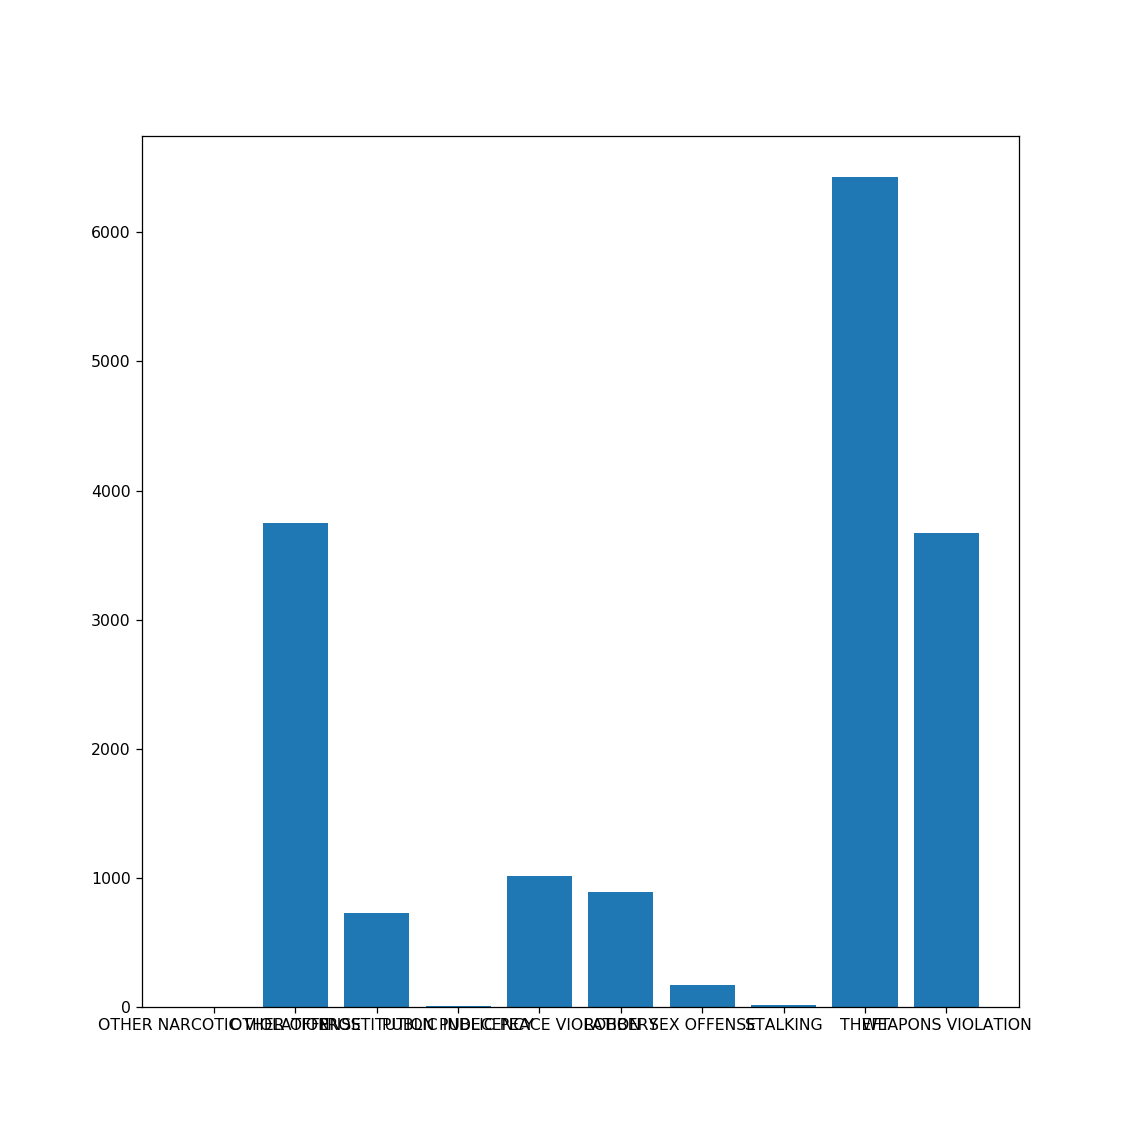

In [25]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Primary Type']).sum()
temp = DataFrame(temp)
temp = temp.reset_index()
temp = temp.tail(10)
plt.bar(temp['Primary Type'],temp['Arrest'])
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

Location wise arrests distribution chart: (8 instances only)

<IPython.core.display.Javascript object>


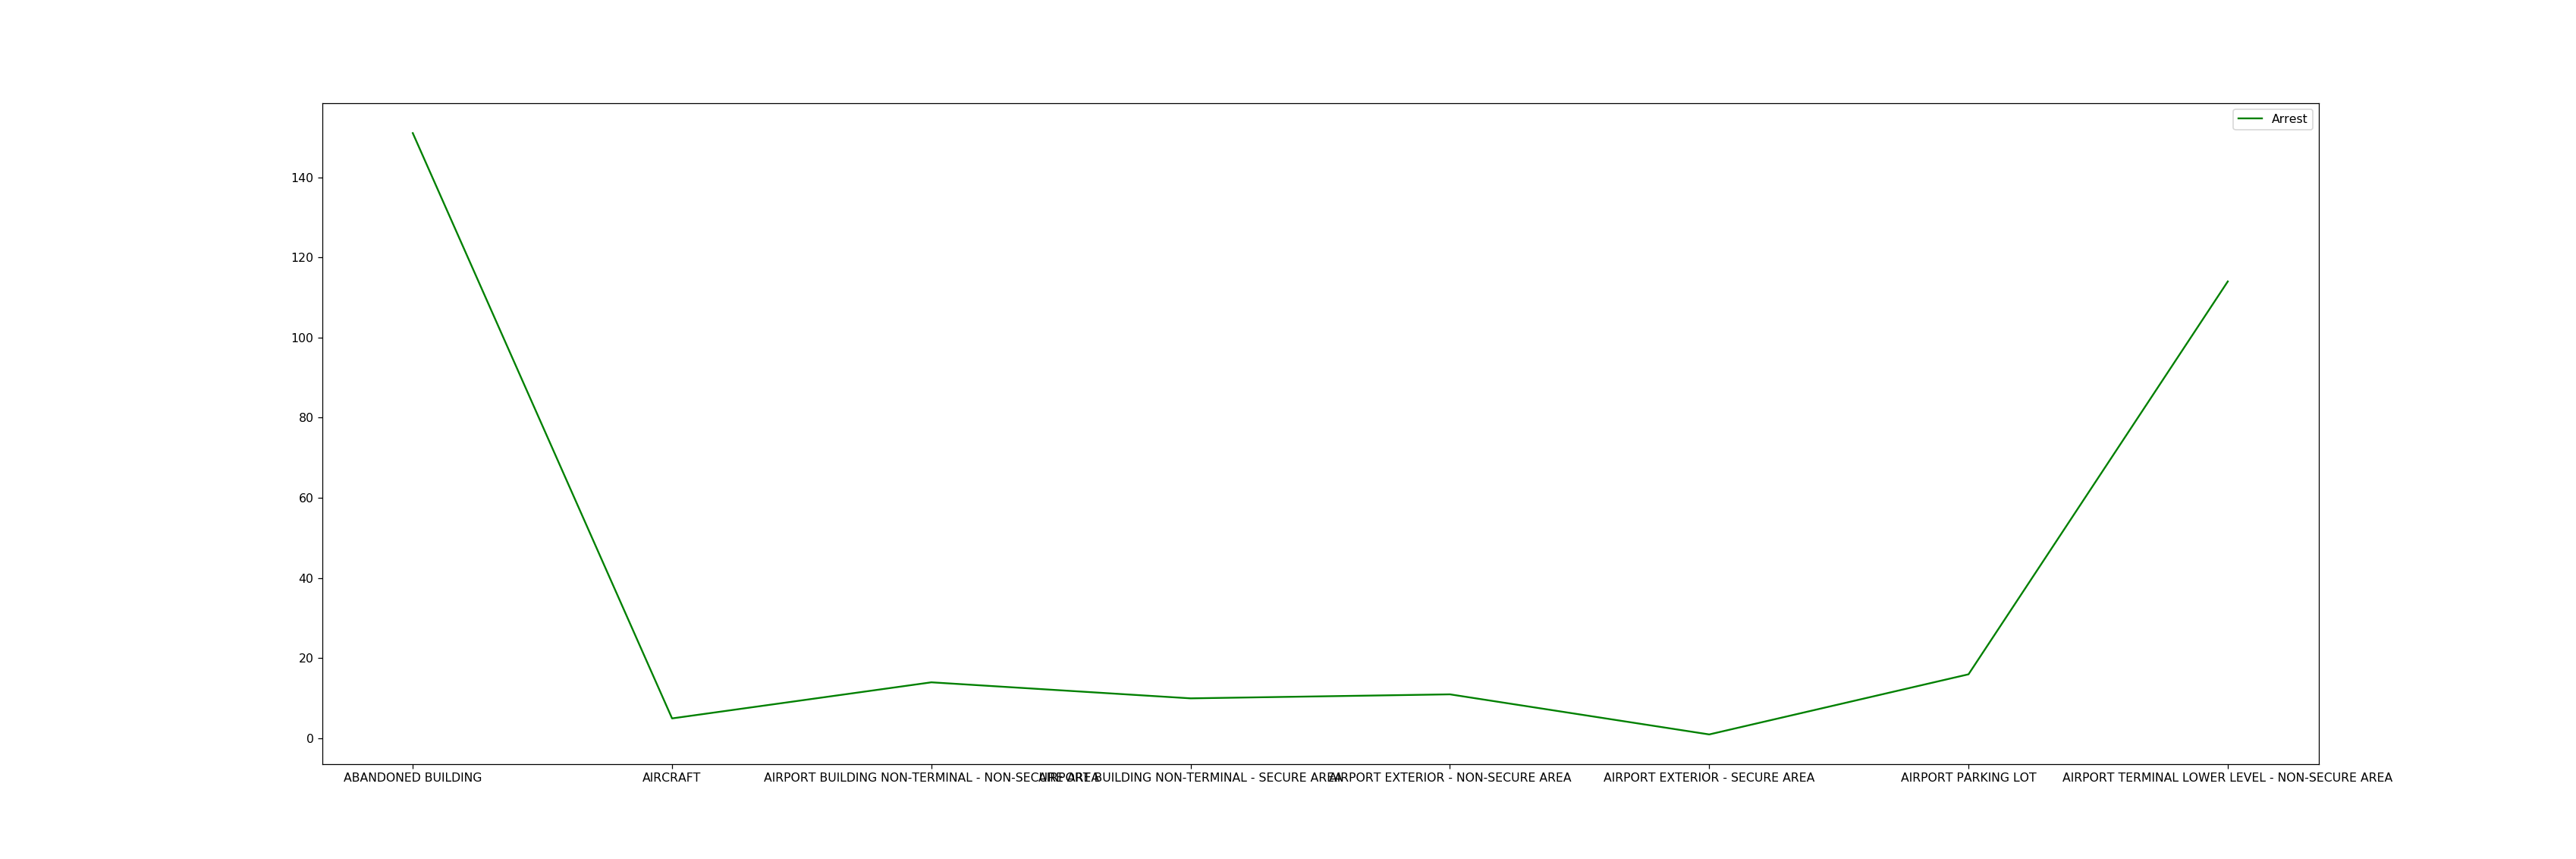

In [26]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Location Description']).sum()
temp = DataFrame(temp)
temp = temp.reset_index()
temp = temp.head(8)
plt.plot(temp['Location Description'],temp['Arrest'],color='green')
plt.legend()
plt.rcParams['figure.figsize'] = [30, 5]
plt.show()

Crime wise arrests, pie chart distribution: (6 instances only)

<IPython.core.display.Javascript object>


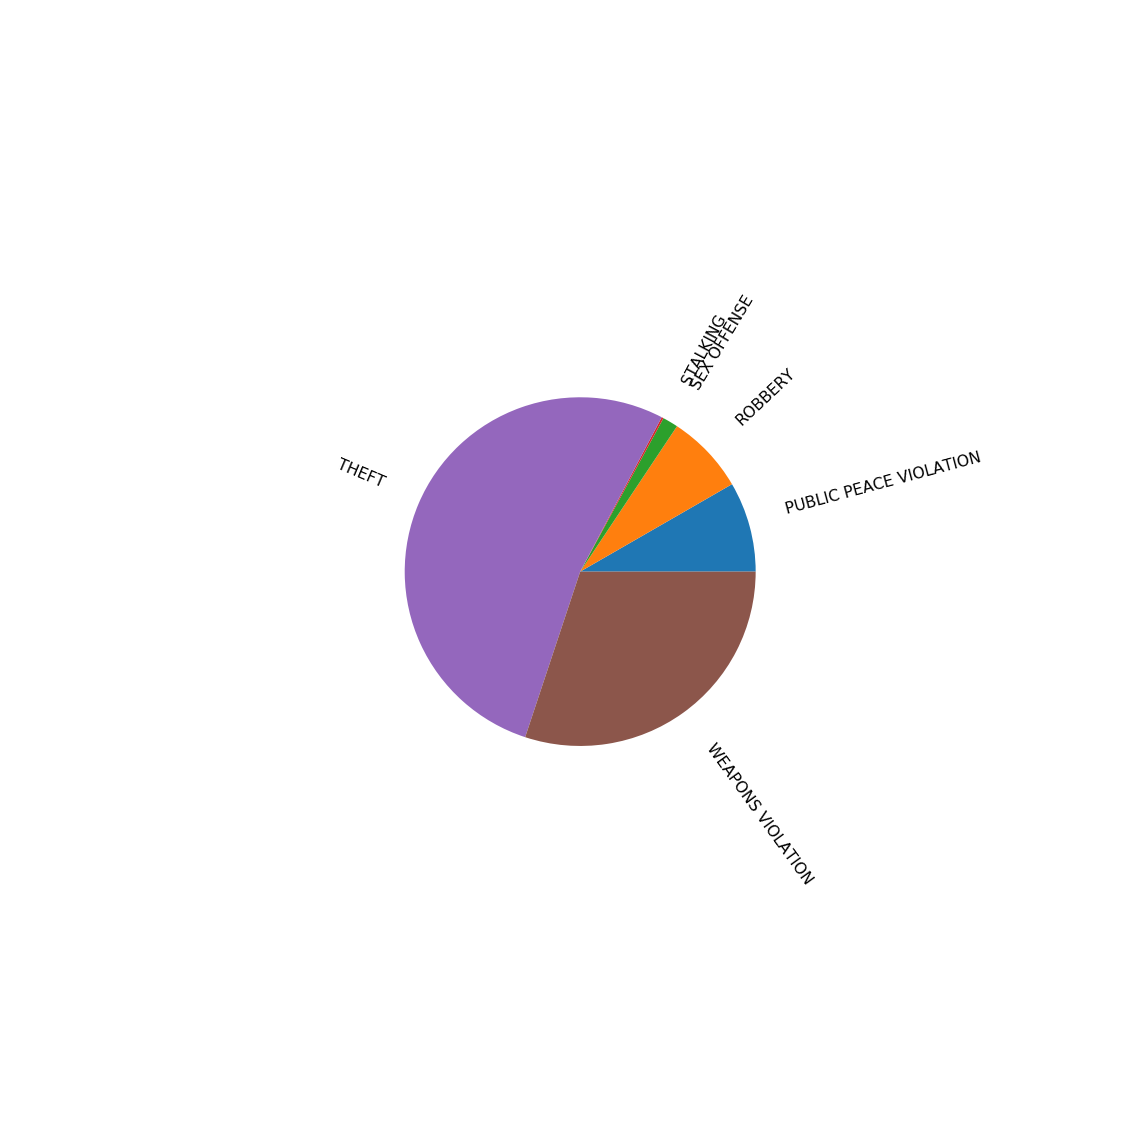

In [27]:
temp = crime_data_new['Arrest'].groupby(crime_data_new['Primary Type']).sum()
temp = temp.tail(6)
labels = temp.tail(6).index
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.size'] = 10.0
plt.pie(temp,labels=labels,rotatelabels=True,radius=0.5,labeldistance = 1.2)
plt.show()

### This was a cursory study on crimes dataset of Chicago using important tools like Python. 

#### The libraries used are numpy and pandas. The visualization tool used was matplotlib. 

## Thanks for reading.